# Projeto 3 - World Happiness Report

## Objetivos

- Fazer uma análise exploratória dos dados dos anos 2015 à 2019 para responder as perguntas:

    1. Quais foram as alterações ano a ano no ranking dos primeiros 10 países?

    2. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano (desconsiderando score e ranking)?

    3. Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GDP?

    4. Qual foi o país que mais subiu no ranking no período inteiro analisado?

    5. Houve países que saíram ou entraram no index?
    
    6. Quais foram os 3 países que mais tiveram mudança (positiva e negativa) na expectativa de vida?

    7. Cite mais 2 conclusões que julgar pertinente sobre o assunto.


## Variáveis

- Happiness Rank - Posição no ranking dos países mais felizes;

- Happiness Score - Somatória das variáveis;

- Economy (GDP per Capita) - Gross Domestic Product (o valor de todos os bens e serviços que um país produz no ano);

- Family - Sim ou não (Pergunta: Se estivesse em problemas, você teria amigos ou família com os quais poderia contar?);

- Health (Life Expectancy) - Calculado pela WHO (World Health Organization);

- Freedom - Sim ou Não;

- Generosity - Sim ou Não (Pergunta: Você doou dinheiro no último ano?);

- Trust (Government Corruption) - Sim ou Não - Duas perguntas (Há corrupção no governo? Há corrupção nas empresas?).


Fonte dos dados: Kaggle (https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv)

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
# Começamos importando as variáveis desejadas do World Happiness Report 
# (anos 2015 a 2019) em um dicionário, no qual a chave representa o ano 
# respectivo daquele report, facilitando assim a chamada do DataFrame 
# desejado.
dfs = {
    "2015": pd.read_csv("dados/2015.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2016": pd.read_csv("dados/2016.csv", index_col="Country", usecols=["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom", "Generosity", "Trust (Government Corruption)"]),
    "2017": pd.read_csv("dados/2017.csv", index_col="Country", usecols=["Country", "Happiness.Rank", "Happiness.Score", "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", "Freedom", "Generosity", "Trust..Government.Corruption."]),
    "2018": pd.read_csv("dados/2018.csv", index_col="Country or region", usecols=["Country or region","Overall rank","Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]),
    "2019": pd.read_csv("dados/2019.csv", index_col="Country or region", usecols=["Country or region","Overall rank", 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Generosity'])
}

In [263]:
# Foi necessária a mudança do nome de algumas linhas para uniformizar 
# os dados entre os DFs dos diferentes anos. Posteriormente, os nomes 
# das colunas também foram uniformizados.

renames = {
    'Northern Cyprus': 'North Cyprus',
    'Hong Kong': 'Hong Kong S.A.R., China',
    'Somaliland region': 'Somaliland Region',
    'Taiwan': 'Taiwan Province of China',
    'Trinidad and Tobago': 'Trinidad & Tobago',
    'North Macedonia': 'Macedonia',
}
for year in range(2015, 2020):
    dfs[str(year)] = dfs[str(year)].rename(index=renames)

In [264]:
# Uniformizamos os nomes das colunas
dfs["2015"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2016"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2017"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
dfs["2018"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']
dfs["2019"].columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

In [265]:
dfs["2015"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.1+ KB


In [266]:
dfs["2016"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 157 non-null    int64  
 1   Happiness Score                157 non-null    float64
 2   Economy (GDP per Capita)       157 non-null    float64
 3   Family                         157 non-null    float64
 4   Health (Life Expectancy)       157 non-null    float64
 5   Freedom                        157 non-null    float64
 6   Trust (Government Corruption)  157 non-null    float64
 7   Generosity                     157 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.0+ KB


In [267]:
dfs["2017"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 155 non-null    int64  
 1   Happiness Score                155 non-null    float64
 2   Economy (GDP per Capita)       155 non-null    float64
 3   Family                         155 non-null    float64
 4   Health (Life Expectancy)       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Trust (Government Corruption)  155 non-null    float64
 7   Generosity                     155 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 10.9+ KB


In [268]:
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 11.0+ KB


In [269]:
# Notamos que na coluna 'Trust (Government Corruption)' havia um valor 
# nulo, que foi preenchido com a média do valor dos anos de 2017 e 2019.
list_trusts = [dfs["2017"]["Trust (Government Corruption)"], dfs["2019"]["Trust (Government Corruption)"]]
df_trusts = pd.concat(list_trusts, axis=1)
mean_trust_2017_2019 = df_trusts.loc["United Arab Emirates"].mean()
dfs["2018"].loc["United Arab Emirates", "Trust (Government Corruption)"] = mean_trust_2017_2019
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to Burundi
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.0+ KB


In [270]:
dfs["2019"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Finland to South Sudan
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 15.0+ KB


# Perguntas
1. Quais foram as alterações ano a ano no ranking dos primeiros 10 países?

In [271]:
ranks = [
    dfs["2015"]["Happiness Rank"].nsmallest(10),
    dfs["2016"]["Happiness Rank"].nsmallest(10),
    dfs["2017"]["Happiness Rank"].nsmallest(10),
    dfs["2018"]["Happiness Rank"].nsmallest(10),
    dfs["2019"]["Happiness Rank"].nsmallest(10),
]
df_ranks = pd.concat(ranks, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]
df_ranks

,2015,2016,2017,2018,2019
Switzerland,1.0,2.0,4.0,5.0,6.0
Iceland,2.0,3.0,3.0,4.0,4.0
Denmark,3.0,1.0,2.0,3.0,2.0
Norway,4.0,4.0,1.0,2.0,3.0
Canada,5.0,6.0,7.0,7.0,9.0
Finland,6.0,5.0,5.0,1.0,1.0
Netherlands,7.0,7.0,6.0,6.0,5.0
Sweden,8.0,10.0,9.0,9.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0
Australia,10.0,9.0,10.0,10.0,NaN


In [272]:
df_ranks.to_csv("resultados/pergunta_01.csv")

Resposta: 

Observando a tabela acima, percebe-se que uma das principais alterações durante os anos observados foi a saída da Austrália e a entrada da Áustria no top 10 do ranking.
Abaixo, um gráfico ilustrativo das alterações ano a ano para cada país.

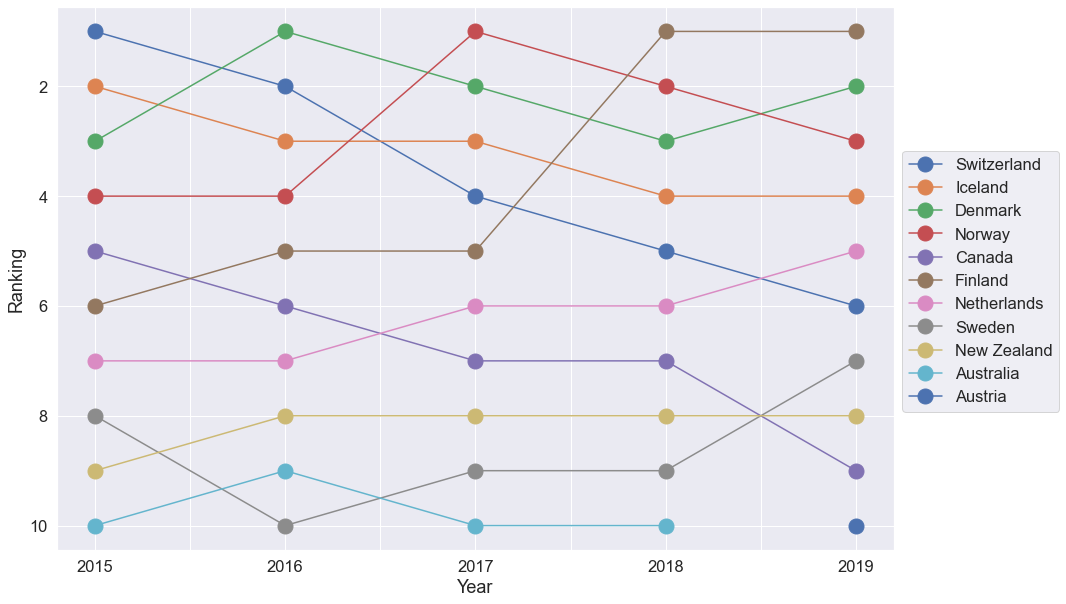

In [312]:
df_ranks.T.plot(kind="line", figsize=(15, 10), ylabel="Ranking", xlabel="Year", marker="o", ms=15).invert_yaxis()
plt.legend(bbox_to_anchor=(1, 0.75))
plt.show()

2. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano (desconsiderando score e ranking)?

In [ ]:
# Primeiramente, criamos uma lista com a média das variáveis para cada ano 
# e concatenamos todas elas em um único DataFrame
means = []
for year in dfs:
    means.append(dfs[year].describe().loc["mean"])
df_means = pd.concat(means, axis=1)
df_means.columns = ["2015", "2016", "2017", "2018", "2019"]

# As colunas 'Happiness Rank' e 'Happiness Score' foram desconsideradas conforme pedido na pergunta
df_means.drop(["Happiness Rank", "Happiness Score"], inplace=True)

# Criamos 4 novas colunas com a porcentagem de mudança das variáveis entre os anos
df_means["2015 a 2016 (%)"] = abs((df_means["2016"] - df_means["2015"]) / df_means["2015"])*100
df_means["2016 a 2017 (%)"] = abs((df_means["2017"] - df_means["2016"]) / df_means["2016"])*100
df_means["2017 a 2018 (%)"] = abs((df_means["2018"] - df_means["2017"]) / df_means["2017"])*100
df_means["2018 a 2019 (%)"] = abs((df_means["2019"] - df_means["2018"]) / df_means["2018"])*100

# Printando as 3 maiores variações ano a ano
display(df_means.nlargest(3, "2015 a 2016 (%)").loc[:, ["2015 a 2016 (%)"]])
display(df_means.nlargest(3, "2016 a 2017 (%)").loc[:, ["2016 a 2017 (%)"]])
display(df_means.nlargest(3, "2017 a 2018 (%)").loc[:, ["2017 a 2018 (%)"]])
display(df_means.nlargest(3, "2018 a 2019 (%)").loc[:, ["2018 a 2019 (%)"]])

In [ ]:
df_means.to_csv("resultados/pergunta_02.csv")

Resposta:

Entre 2015 e 2016, as maiores variações ocorreram para as variáveis 'Family', 'Freedom' e 'Economy'.

Entre 2016 e 2017, 'Trust', 'Family' e 'Generosity'.

Entre 2017 e 2018, 'Trust', 'Generosity' e 'Freedom'.

Entre 2018 e 2019, 'Health', 'Freedom' e 'Trust'.

3. Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GDP?


In [ ]:
# Inicialmente, selecionamos a coluna de 'Economy (GDP per Capita)' de cada
# ano e concatemos num único DF.
gdps = [
    dfs["2015"]["Economy (GDP per Capita)"],
    dfs["2016"]["Economy (GDP per Capita)"],
    dfs["2017"]["Economy (GDP per Capita)"],
    dfs["2018"]["Economy (GDP per Capita)"],
    dfs["2019"]["Economy (GDP per Capita)"],
]
df_gdps = pd.concat(gdps, axis=1)
df_gdps.columns = ["2015", "2016", "2017", "2018", "2019"]

#Para auxiliar na análise, os valores iguais a 0 foram convertidos em NaN
df_gdps.replace(0, np.nan, inplace=True)

# Criamos 4 novas colunas com a porcentagem de mudança do GDP entre os anos
df_gdps["2015 a 2016 (%)"] = (df_gdps["2016"]/df_gdps["2015"] - 1)*100
df_gdps["2016 a 2017 (%)"] = (df_gdps["2017"]/df_gdps["2016"] - 1)*100
df_gdps["2017 a 2018 (%)"] = (df_gdps["2018"]/df_gdps["2017"] - 1)*100
df_gdps["2018 a 2019 (%)"] = (df_gdps["2019"]/df_gdps["2018"] - 1)*100
df_gdps = df_gdps.reset_index()

# Reorganizamos o DF utilizando o nome dos países como índice (pode haver 
# mais de uma aparição) com os correspondentes valores de variação do GDP
df_gdps = pd.melt(df_gdps,  id_vars=['index'], value_vars=['2015 a 2016 (%)', '2016 a 2017 (%)','2017 a 2018 (%)','2018 a 2019 (%)'])
df_gdps.columns = ["Country", "Year", "Delta GDP (%)"]
print(f"{'Maiores variações positivas de GDP':^45}")
display(df_gdps.nlargest(3, 'Delta GDP (%)'))
print(f"\n{'Maiores variações negativas de GDP':^45}")
display(df_gdps.nsmallest(3, 'Delta GDP (%)'))

In [ ]:
df_gdps.to_csv("resultados/pergunta_03.csv")

Resposta:

Os países que tiveram o maior crescimento da GDP no período observado foram Malawi (2015-2016), Burundi (2015-2016) e Malawi (2016-2017). 

Já os países que tiveram maior queda no GDP foram Burundi (2018-2019), Libéria (2017-2018) e Iêmen (2018-2019).

4. Qual foi o país que mais subiu no ranking no período inteiro analisado?

In [ ]:
# Inicialmente, selecionamos a coluna de 'Happiness Rank' de cada ano e
# concatemos em um único DF.
rankings = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(rankings, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]

# Foram removidas quaisquer linhas que apresentassem NaN, ou seja, países
# que não tiveram o índice calculado em todos os anos observados. 
df_ranks.dropna(inplace=True)

# Criamos uma nova coluna com a variação no ranking entre 2015 e 2019 
# para cada país, ordenamos os valores e visualizamos os 5 primeiros.
df_ranks["Delta"] = df_ranks["2015"] - df_ranks["2019"]
df_ranks.sort_values(by="Delta", ascending=False, inplace=True)
df_ranks.head()

In [ ]:
df_ranks.to_csv("resultados/pergunta_04.csv")

Resposta:

O país que mais subiu no ranking entre 2015 e 2019 foi Benin.

5. Houve países que saíram ou entraram no index?


In [ ]:
# Inicialmente, selecionamos a coluna de 'Happiness Rank' de cada ano 
# e concatemos em um único DF.
rankings = [
    dfs["2015"]["Happiness Rank"],
    dfs["2016"]["Happiness Rank"],
    dfs["2017"]["Happiness Rank"],
    dfs["2018"]["Happiness Rank"],
    dfs["2019"]["Happiness Rank"],
]
df_ranks = pd.concat(rankings, axis=1)
df_ranks.columns = ["2015", "2016", "2017", "2018", "2019"]

# Selecionamos todas as linhas que tivessem pelo menos um valor NaN no DF. 
df_entraram_sairam = df_ranks[df_ranks.isna().any(axis=1)]
df_entraram_sairam = df_entraram_sairam.sort_index()
print(f"{len(df_entraram_sairam)} countries entered and left the rankings")
df_entraram_sairam

In [ ]:
df_entraram_sairam.to_csv("resultados/pergunta_05.csv")

Resposta:

No período analisado, 18 países entraram ou saíram do ranking.

6. Quais foram os 3 países que mais tiveram mudança (positiva e negativa) na expectativa de vida?


In [ ]:
# Inicialmente, selecionamos a coluna de 'Health (Life Expectancy)' de cada
# ano e concatemos num único DF.
healths = [
    dfs["2015"]["Health (Life Expectancy)"],
    dfs["2016"]["Health (Life Expectancy)"],
    dfs["2017"]["Health (Life Expectancy)"],
    dfs["2018"]["Health (Life Expectancy)"],
    dfs["2019"]["Health (Life Expectancy)"],
]
df_health = pd.concat(healths, axis=1)
df_health.columns = ["2015", "2016", "2017", "2018", "2019"]

#Para auxiliar na análise, os valores iguais a 0 foram convertidos em NaN
df_health.replace(0, np.nan, inplace=True)

# Criamos 4 novas colunas com a porcentagem de mudança de Health entre os anos
df_health["2015 a 2016 (%)"] = (df_health["2016"]/df_health["2015"] - 1)*100
df_health["2016 a 2017 (%)"] = (df_health["2017"]/df_health["2016"] - 1)*100
df_health["2017 a 2018 (%)"] = (df_health["2018"]/df_health["2017"] - 1)*100
df_health["2018 a 2019 (%)"] = (df_health["2019"]/df_health["2018"] - 1)*100
df_health = df_health.reset_index()

# Reorganizamos o DF utilizando o nome dos países como índice (pode haver 
# mais de uma aparição) com as correspondentes variações do valor Health
df_health = pd.melt(df_health,  id_vars=['index'], value_vars=['2015 a 2016 (%)', '2016 a 2017 (%)','2017 a 2018 (%)','2018 a 2019 (%)'])
df_health.columns = ["Country", "Year", "Health (%)"]
print(f"{'Maiores variações positivas de Health':^42}")
display(df_health.nlargest(3, 'Health (%)'))
print(f"\n{'Maiores variações negativas de Health':^42}")
display(df_health.nsmallest(3, 'Health (%)'))

In [ ]:
df_health.to_csv("resultados/pergunta_06.csv")

Resposta:

Os países que tiveram o maior variação positiva do índice Health no período observado foram República Centro-Africana (2018-2019), Botsuana (2015-2016) e Angola (2017-2018). 

Já os países que tiveram maior variação negativa no índice Health foram Chade (2015-2016), Costa do Marfim (2015-2016) e Angola (2015-2016).

7. Cite mais 2 conclusões que julgar pertinente sobre o assunto.

Conclusão 1:

Há uma forte correlação sugerida entre os índices "Economy (GDP per Capita)" e "Health (Life Expectancy) que variou de 82% para 84% entre os anos observados.

Percebeu-se também um aumento de 10% da correlação entre "Economy (GDP per Capita)" e "Family", que passou de 65% para 75% entre os anos observados.

In [ ]:
# Usando o Seaborn para o heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10, 7)}, font_scale=1.5)

def plot_heatmap(ano):
    # Copia para não alterar o original
    plt.clf()
    df = dfs[ano].copy()

    # Remove as colunas que não precisamos
    df.drop(["Happiness Rank", "Happiness Score"], axis=1, inplace=True)
    df.columns = ["Economy", "Family", "Health", "Freedom", "Trust", "Generosity"]

    # Dataframe de correlação
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        fmt=".2g",
        annot=True,
        cmap="bwr",
        linewidths=.5,
        vmin=-1,
        vmax=1,
    )
    ax.set_title(f"Correlação entre variáveis - {ano}")
    return ax

figs = []
for ano in dfs:
    fig = plot_heatmap(ano)
    figs.append(fig)
    plt.show()
    # fig.get_figure().savefig(f"correlacao_{ano}.png", dpi=300, transparent=True)